# Quantenalgorithmus - Ein Beispiel

Das folgende Kapitel beschäftigt sich schließlich mit der Ausführung eines beispielhaften Quantenalgorithmus mit Hilfe der erlernten Grundlagen. Am Beispiel des Grover-Algorithmus [GRO] wird direkt ein praktisches Beispiel demonstriert, bei dem Quantencomputer klassischen Computersystemen überlegen sind. Der Grover-Algorithmus ist ein Suchverfahren, mit dem unstrukturierte Datensätze durchsucht werden können. Während klassische Suchverfahren $O(N)$ Schritte benötigen, um eine Suche innerhalb eines unsortierten Datensatzes durchzuführen, schafft der Grover dies bereits in $O(\sqrt{N})$ Schritten.

Zum Abschluss dieses Kapitels und dieses Tutorials wird ein Fazit gezogen und ein Ausblick in die Zukunft der Quantencomputer geworfen.

Quellen:
- [QIS1]: Qiskit.org. 2021. Defining Quantum Circuits [online] Available at: https://qiskit.org/textbook/ch-algorithms/defining-quantum-circuits.html [Accessed 1 March 2021].
- [QIS2]: Qiskit.org. 2021. Grover's Algorithm [online] Available at: https://qiskit.org/textbook/ch-algorithms/grover.html [Accessed 5 March 2021].
- [QIS3]: Qiskit.org. 2021. Classical Computation on a Quantum Computer
 [online] Available at: https://qiskit.org/textbook/ch-gates/oracles.html [Accessed 5 March 2021].
- [GRO]: Grover, Lov K. "A fast quantum mechanical algorithm for database search." Proceedings of the twenty-eighth annual ACM symposium on Theory of computing. 1996.
- [ELL]: Ellerhoff, B. M. (2020). Quantencomputer heute und morgen. In Mit Quanten rechnen (pp. 21-32). Springer Spektrum, Wiesbaden.

## Grover
Mit Hilfe des Grover-Algorithmus können wir effizient nach Elementen in unstrukturierten Datensätzen suchen [QIS2]. Im folgenden Beispiel werden wir einige Funktionen aus dem Qiskit-Framework verwenden, um die Implementierung des Grover-Algorithmus zu erleichtern. Im Prinzip können wir den Grover-Algorithmus mit den bereits erlernten Gattern entwickeln. Aber das Framework Qiskit bietet hierfür eine Abhilfe, die uns einiges an Zeit ersparen wird. Um überhaupt eine Suche durchführen zu können, müssen wir zunächst einen Grundbestand an Daten haben und festlegen, wonach wir suchen wollen. Als Grundlage stellen wir uns zunächst ein 4-Bit- oder Qubit-System vor. In einem 4-Bit-System können wir 24 verschiedene Zustände beschreiben. Als nächstes definieren wir eine logische Operation, mit der wir die Zustände, nach denen wir suchen wollen, mit dem Grover-Algorithmus festlegen. Bevor wir jedoch den Algorithmus ausführen, laden wir die benötigten Bibliotheken.

In [19]:
from qiskit import QuantumCircuit, execute, BasicAer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle

Qiskit bietet die Möglichkeit, sogenannte "Orakel" zu definieren [QIS3]. Ein Orakel kann man sich als Blackbox vorstellen. Diese Blackbox bekommt einen Eingangswert und gibt einen entsprechenden Ausgangswert aus, der durch eine Funktion bestimmt worden ist. In unserem Beispiel definieren wir als String einen logischen Ausdruck, welcher einen Zustand angibt, den wir suchen möchten. In unserem Beispiel möchten wir zunächst den Zustand $|0001\rangle$ finden (Achtung: qiskit repräsentiert die Bitfolge umgekehrt).

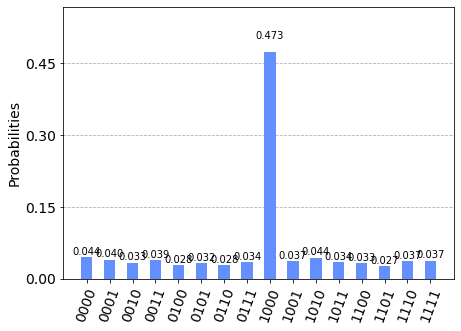

In [30]:
## a, b, c, d repräsentieren die einzelnen Bits
search_string = '(~a & ~b & ~c & d)'
oracle = LogicalExpressionOracle(search_string)
grover_instance = Grover(oracle)
q_instance = QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=2048)
result = grover_instance.run(q_instance)
plot_histogram(result.measurement)

Zunächst definieren wir unseren String, mit dessen Hilfe die Suche durchgeführt wird. Die Buchstaben a, b, c, d stehen repräsentativ für einen Bitwert. Mithilfe von "~" können wir ein "NOT"-Operator auf den jeweiligen Bit anwenden. Es gilt ~$a = 0$ und $a = 1$. Mithilfe von "&" können wir den "AND"-Operator anwenden. Wir suchen also explizit nach dem Zustand "0001". Im nächsten Schritt erzeugen wir unser Orakel mithilfe der der "LogicalExpressionOracle()"-Funktion. Diese erwartet unseren definierten String, um das entsprechende Objekt erzeugen zu können. Im nächsten Schritt erzeugen wir ein Grover-Objekt. Die Qiskit Bibliothek erlaubt es uns schnell die grundlegende Struktur eines QuantumCircuits zu nutzen, der die benötigten Gatter implementiert, um den Grover auszuführen, ohne dass wir das machen müssen. Das Ergebnis entspricht unserer Suchvorgabe. Das ganze können wir auch für mehrere Zustände gleichzeitig definieren. Diesmal suchen wir nach den Zuständen $|1000\rangle$ und $|1001\rangle$.

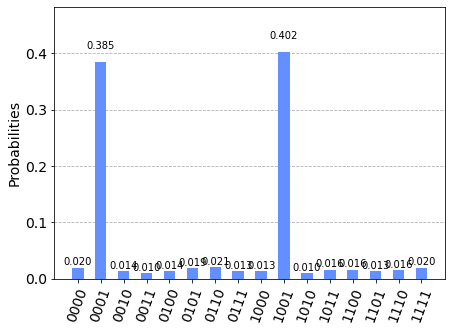

In [31]:
## a, b, c, d repräsentieren die einzelnen Bits
search_string = '(a & ~b & ~c & ~d) ^ (a & ~b & ~c & d)'
oracle = LogicalExpressionOracle(search_string)
grover_instance = Grover(oracle)
q_instance = QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=2048)
result = grover_instance.run(q_instance)
plot_histogram(result.measurement)

## Fazit
Wir sehen: Mithilfe von Qiskit können wir die Standard-Quantenalgorithmen relativ einfach unkompliziert implementieren. Die Frage, die jetzt bestehen bleibt ist, lohnt es sich, die Zeit in Quantencomputer zu investieren? Grundsätzlich wissen wir bereits, dass Quantencomputer in bestimmten Bereichen oder bei bestimmten Fragen schneller zum Ergebnis kommen als die bisher eingesetzten klassischen Systemen. Gerade bei Aufgaben, bei denen sehr viele parallele Rechenvorgänge gleichzeitig gemacht werden müssen, sind die Quantencomputer theoretisch überlegen. Auch im Bereich der Verschlüsselung und Entschlüsselung könnten die Quantencomputer die informationstechnische Welt auf den Kopf stellen. 

Im Gegensatz dazu steht, dass es bis heute keine standardisierten Quantencomputer-Systeme [ELL], deshalb bleibt es noch abzuwarten, welche Systeme und ob sich diese überhaupt durchsetzen werden. Abschließend lässt sich jedoch sagen, dass Quantencomputer vor allem in der Forschung Ihre Berechtigung haben, da mithilfe dieser Computer in der Zukunft einige große Problemstellungen aus verschiedensten Fachbereichen gelöst werden könnten.